# Importing Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [43]:
df=pd.read_csv("C:\\Users\\91741\\Downloads\\Mall_Customers (1).csv")

In [44]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
df.shape

(200, 5)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [47]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Data Visualisation

# Univariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

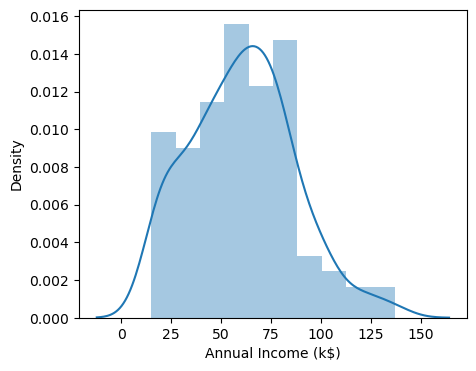

In [48]:
plt.figure(figsize=(5,4))
sns.distplot(df['Annual Income (k$)'])

<Figure size 640x480 with 0 Axes>

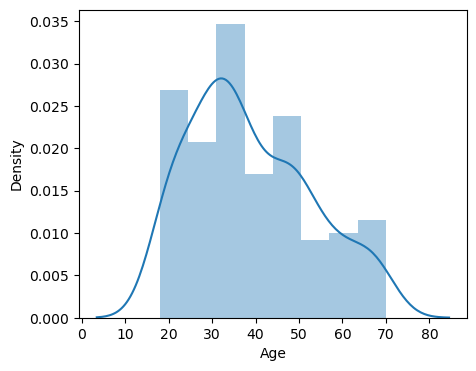

<Figure size 640x480 with 0 Axes>

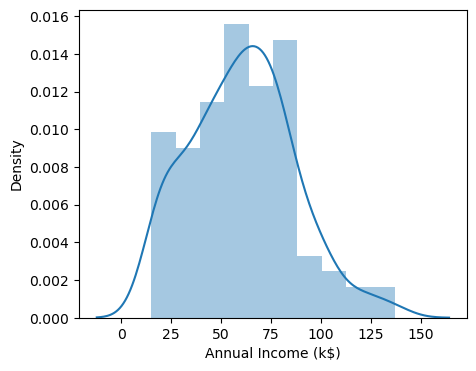

<Figure size 640x480 with 0 Axes>

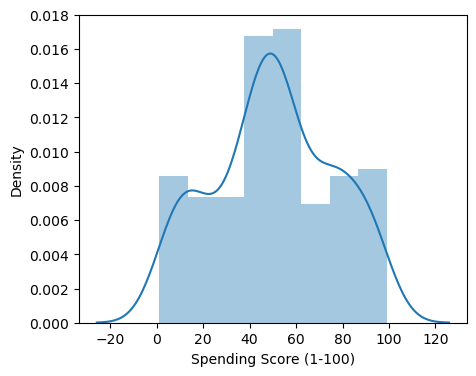

In [49]:
columns=['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    plt.figure(figsize=(5,4))
    sns.distplot(df[i])

**All above curves are almost normally distributed and shows that most of density lies at middle of these features**

**The spending score of most of people is around 40-60.**

**The age of most of people is around 30-40**

**The annual income lies in between 50-75(k$)**

<Figure size 640x480 with 0 Axes>

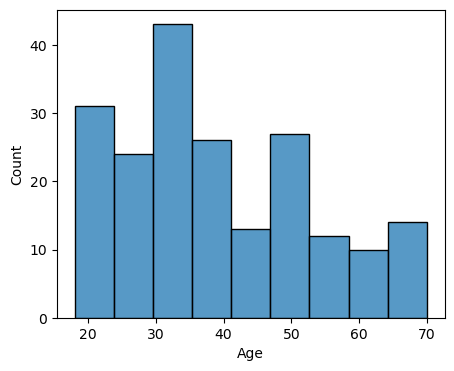

<Figure size 640x480 with 0 Axes>

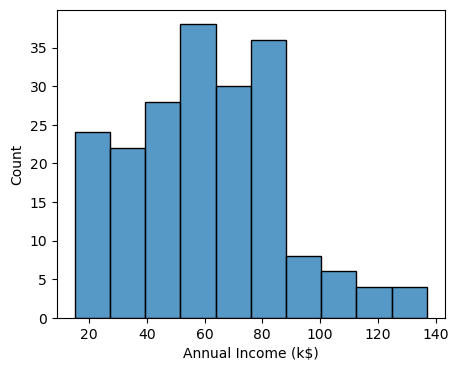

<Figure size 640x480 with 0 Axes>

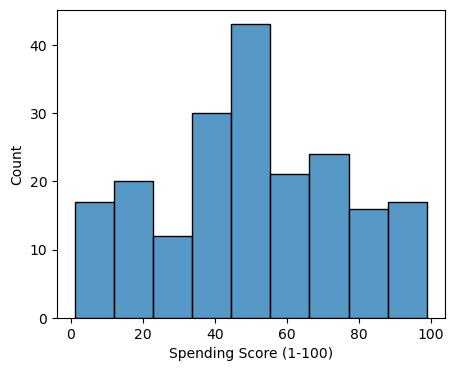

In [50]:
columns=['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    plt.figure(figsize=(5,4))
    sns.histplot(df[i])

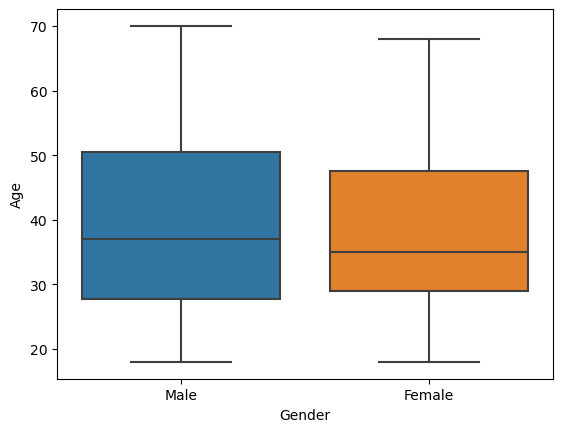

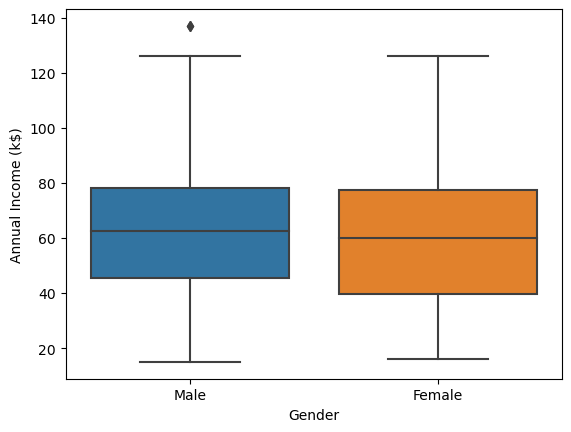

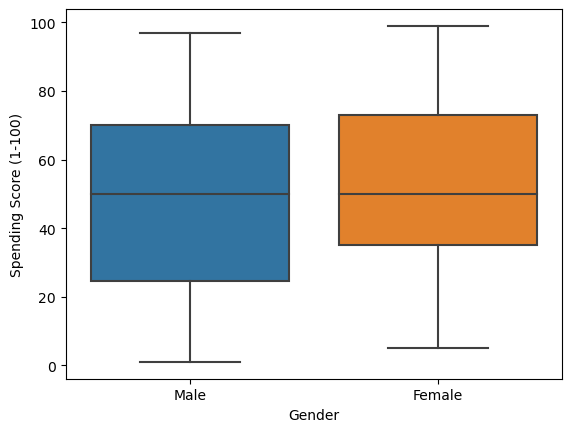

In [51]:
columns=['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

**Males have slightly more median age,Annual income than females , but the spending score of females is more than males**

In [52]:
count_gen=df['Gender'].value_counts()
labels=['Female','Male']

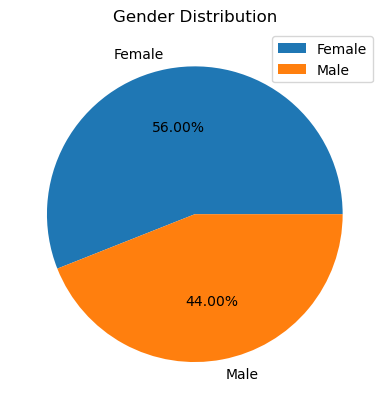

In [53]:
plt.pie(count_gen,labels=labels,autopct='%.2f%%')
plt.title('Gender Distribution')
plt.legend()
plt.show()

**Observation**

Their is majority of female customers coming to mall.

# Checking the distribution

In [54]:
numerical_features = [col for col in df.columns if df[col].dtypes != 'O']
discrete_features = [col for col in numerical_features if len(df[col].unique()) < 10 and col not in ['CustomerID']]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features+['CustomerID']]
categorical_features = [col for col in df.columns if df[col].dtype == 'O']

print("Total Number of Numerical Columns : ",len(numerical_features))
print("Number of discrete features : ",len(discrete_features))
print("No of continuous features are : ", len(continuous_features))
print("Number of categorical features : ",len(categorical_features))
     

Total Number of Numerical Columns :  4
Number of discrete features :  0
No of continuous features are :  3
Number of categorical features :  1


In [55]:
from scipy import stats
from scipy.stats import norm, skew 

In [56]:
# get the features except object types
numeric_feats =df.dtypes[df.dtypes != 'object'].index

# check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x : skew(x.dropna())).sort_values(ascending = False)
print('\n Skew in numberical features: \n')
skewness_df = pd.DataFrame({'Skew' : skewed_feats})
print(skewness_df.head(10))


 Skew in numberical features: 

                            Skew
Age                     0.481919
Annual Income (k$)      0.319424
CustomerID              0.000000
Spending Score (1-100) -0.046865


**from above**

**The distribution of continuous features are normally distributed.**

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

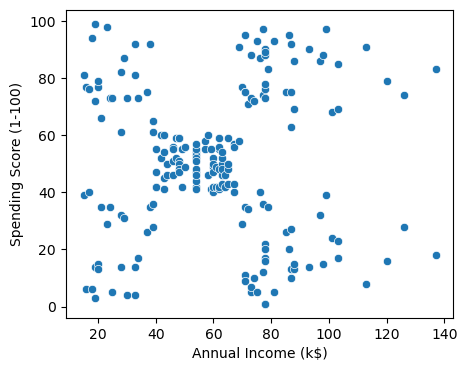

In [16]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

**Observation**

The spending score vs annual income shows variety in distribution

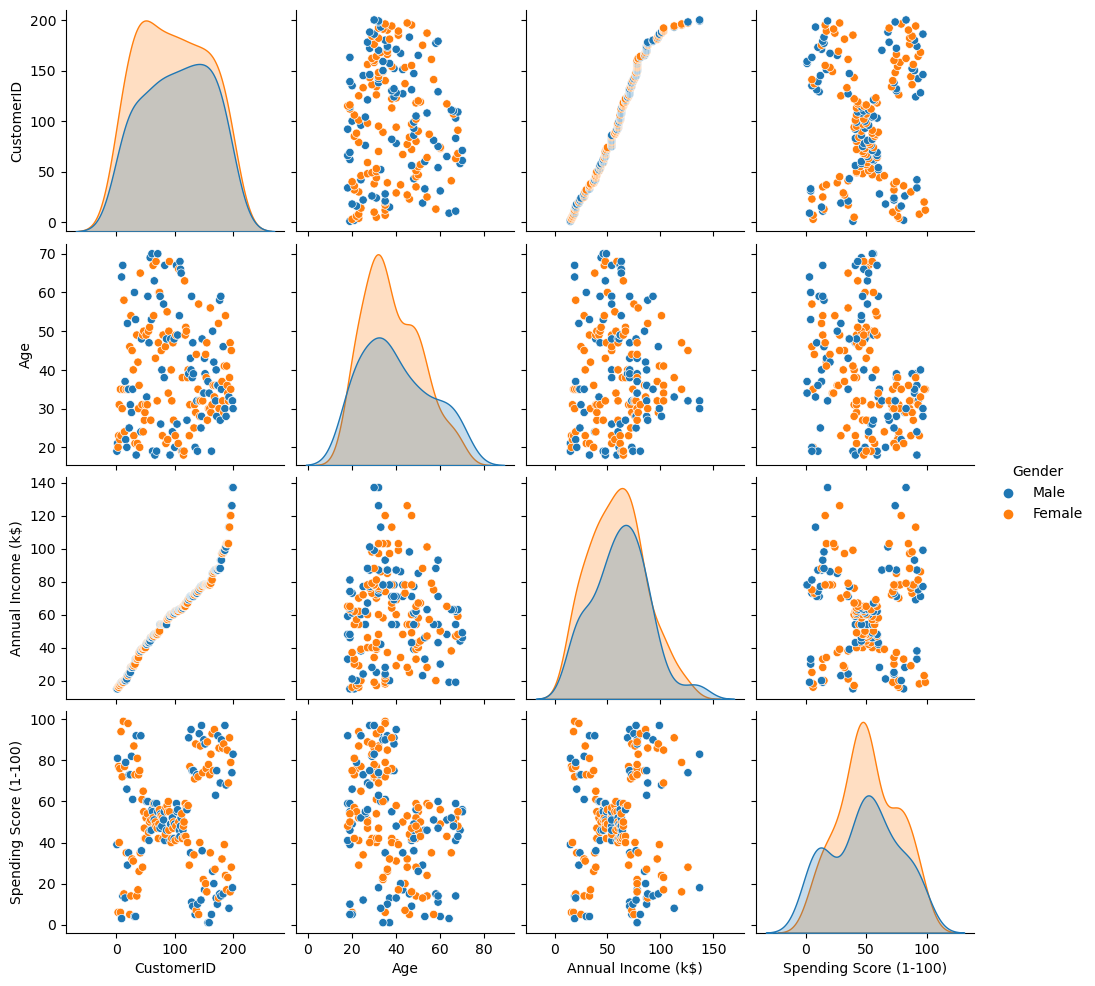

In [19]:
sns.pairplot(df,hue='Gender')

*Pairplot plots pair-wise relationship between all the variables of dataset*

In [20]:
df.groupby(['Gender'])['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


# Correlation Matrix

<Axes: >

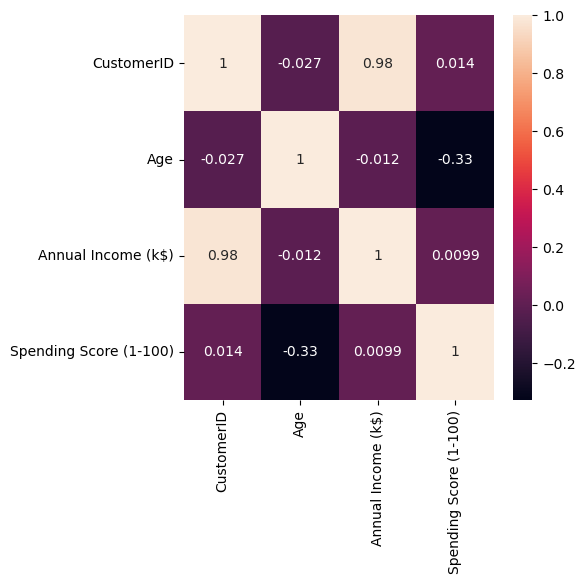

In [21]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)

# Observation

This shows the correlation among the different attributes of Mall.Their are also features with very less correlation.From this 
observation we can drop CustomerID

# Feature Engineering

In [17]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Dropping some unimportant features**

In [57]:
df.drop(columns=['CustomerID','Gender'],inplace=True)

In [58]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


# Model Building for Clustering Analysis

In [39]:
S=df.iloc[:,[0,2]].values

In [40]:
print(S.shape)

(200, 2)


In [41]:
S

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [59]:
M=df.iloc[:,[1,2]].values

In [60]:
M

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## K-means Clustering Algorithm

### Number of clusters from graph

*For this we have to first calculate the number of clusters required to train the model.*

*This can be done by Elbow method which plots the graph between WCSS(Within cluster sum of squares) and number of clusters . And this can also be find out using silhouette score*

*WCSS is the sum of the squared distance between each point and the centroid in a cluster*
*Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

## Making clusters for M (Annual Income and Spending Score)

In [44]:
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.cm as cm
wcss=[]

for itr in range(1,11):
    km=KMeans(n_clusters=itr,init='k-means++',random_state=8)
    km.fit(M)
    wcss.append(km.inertia_)

Text(0, 0.5, 'wcss')

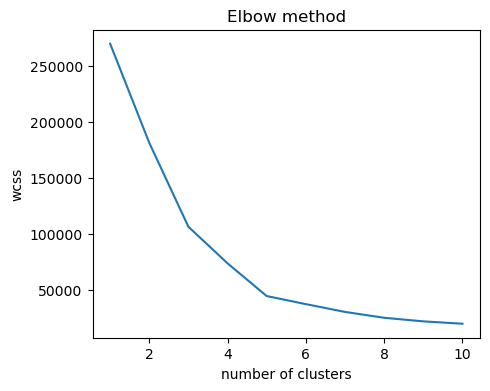

In [45]:
plt.figure(figsize=(5,4))
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')

**From the above graph we can say that number of clusters=5**

# Silhouette Score Method

For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5376203956398481
For n_clusters = 7 The average silhouette_score is : 0.5270287298101395
For n_clusters = 8 The average silhouette_score is : 0.4572211842776841
For n_clusters = 9 The average silhouette_score is : 0.45872989167156364
For n_clusters = 10 The average silhouette_score is : 0.4467356774401869


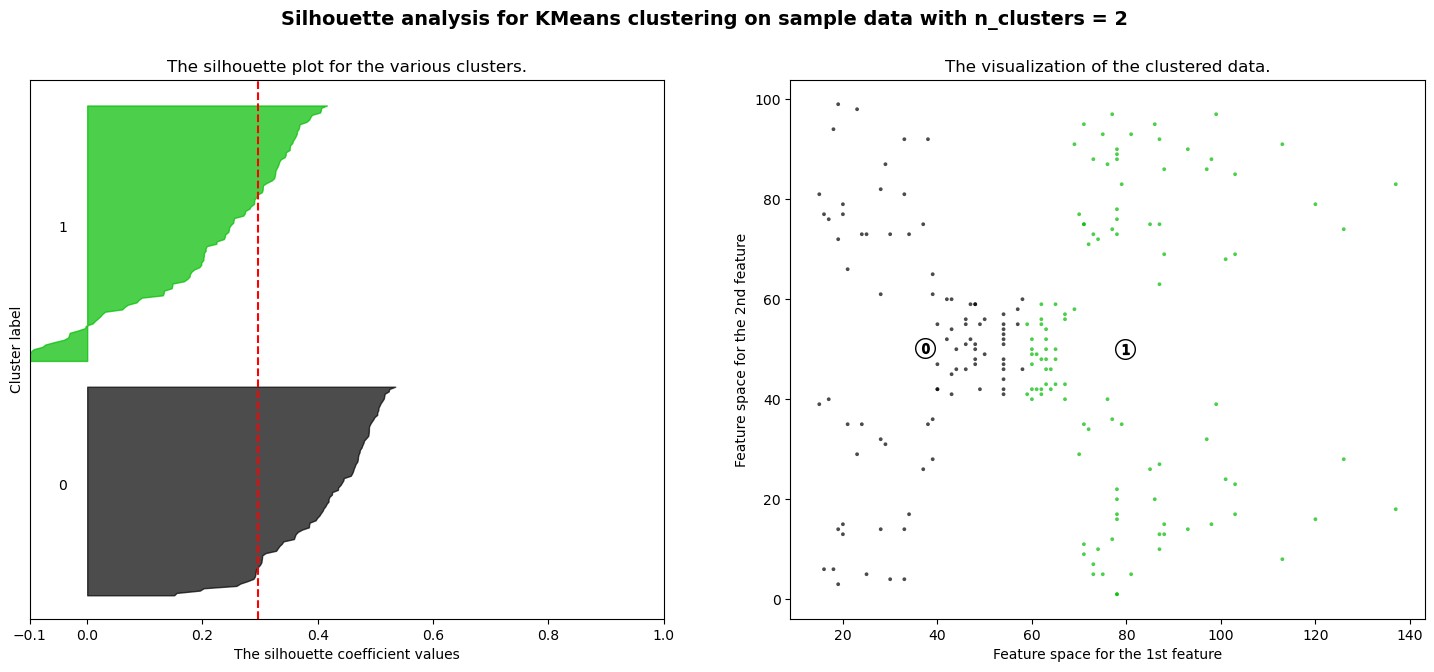

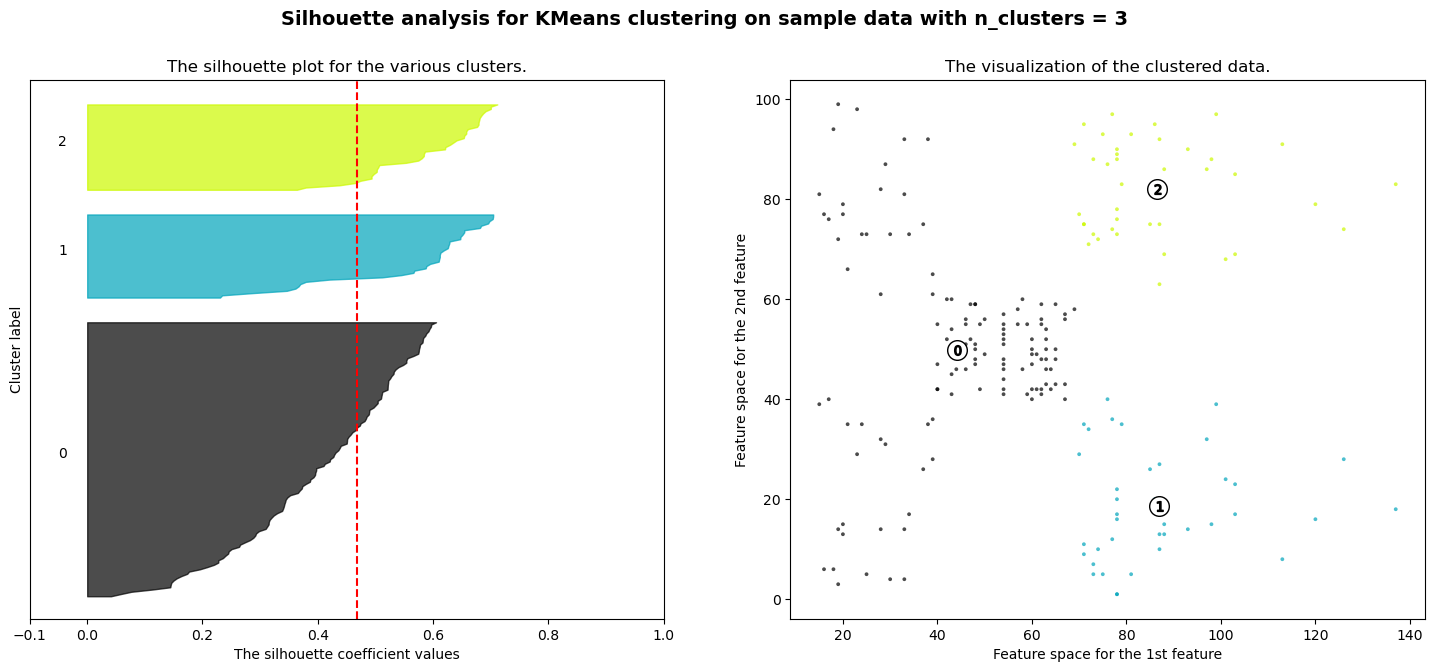

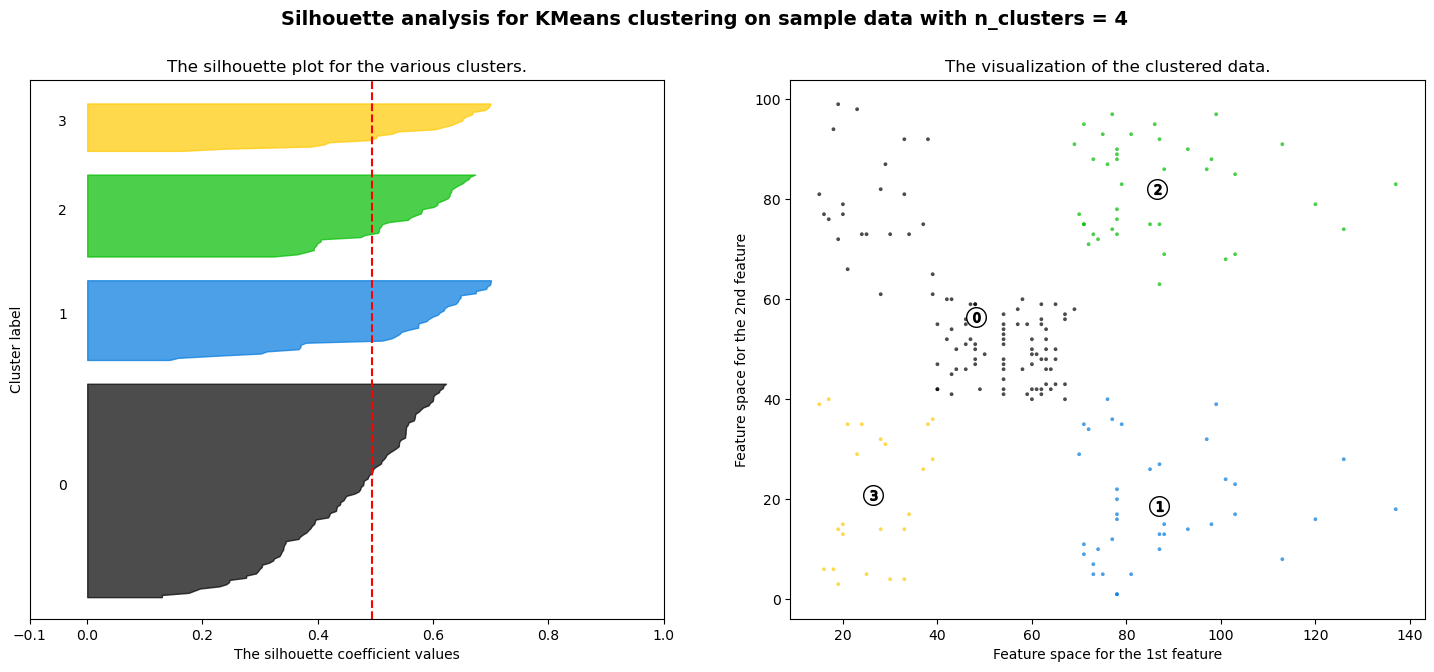

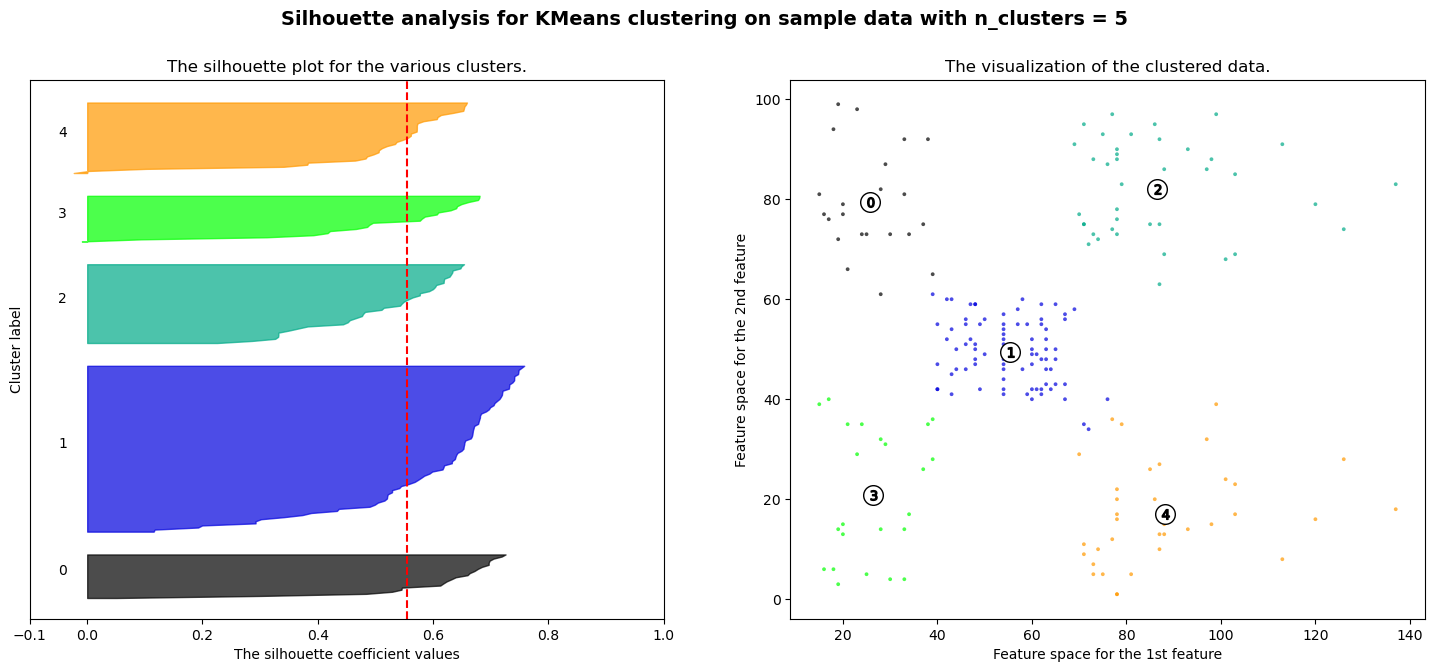

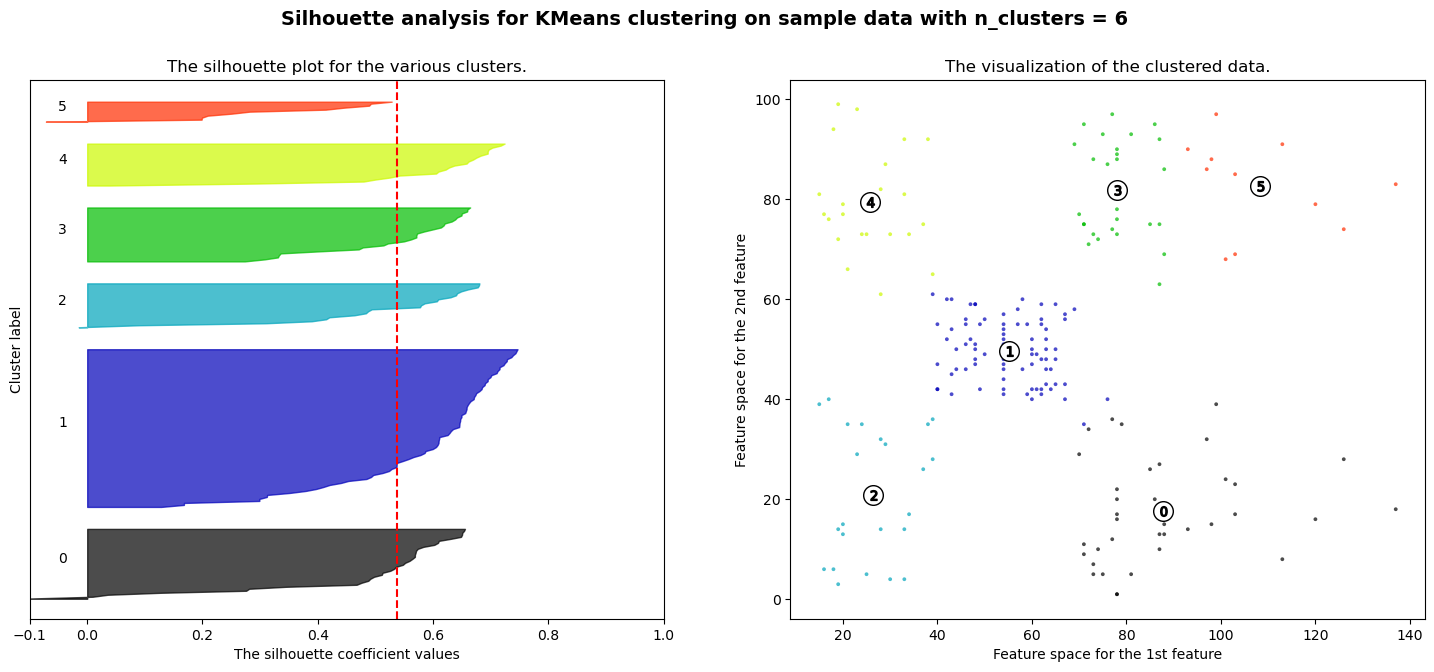

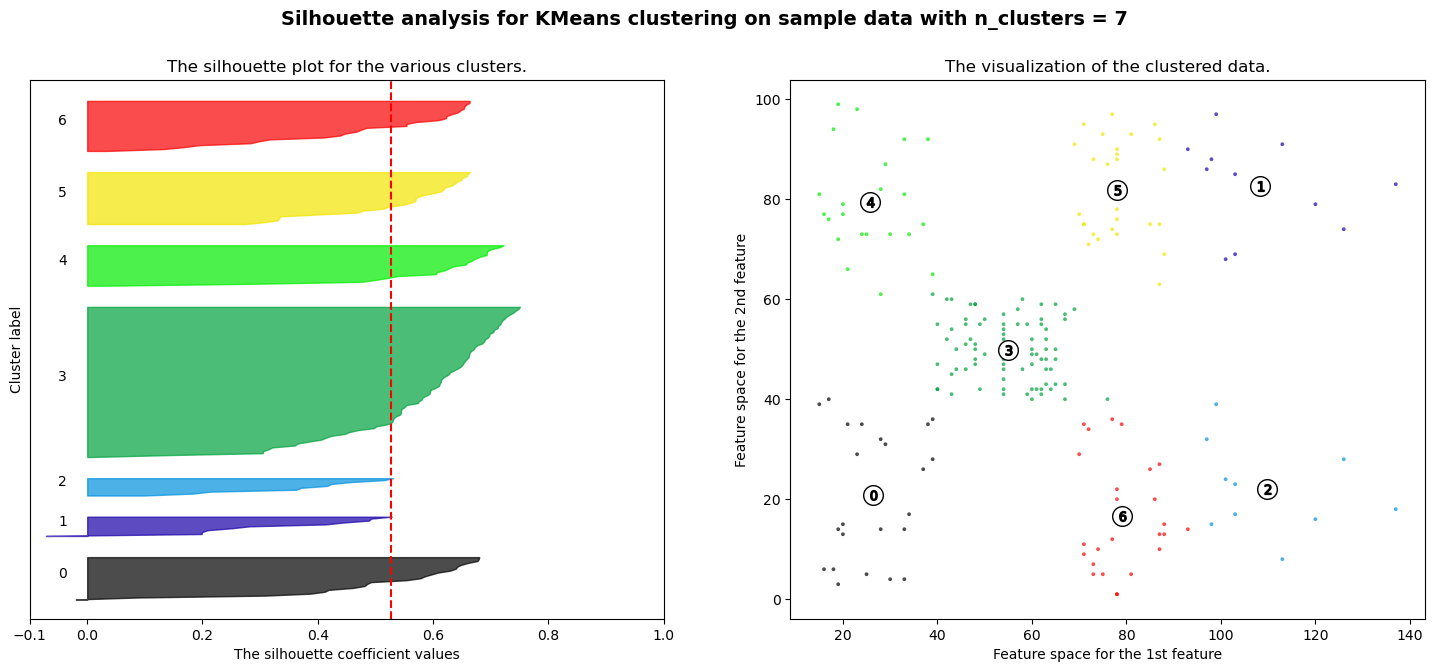

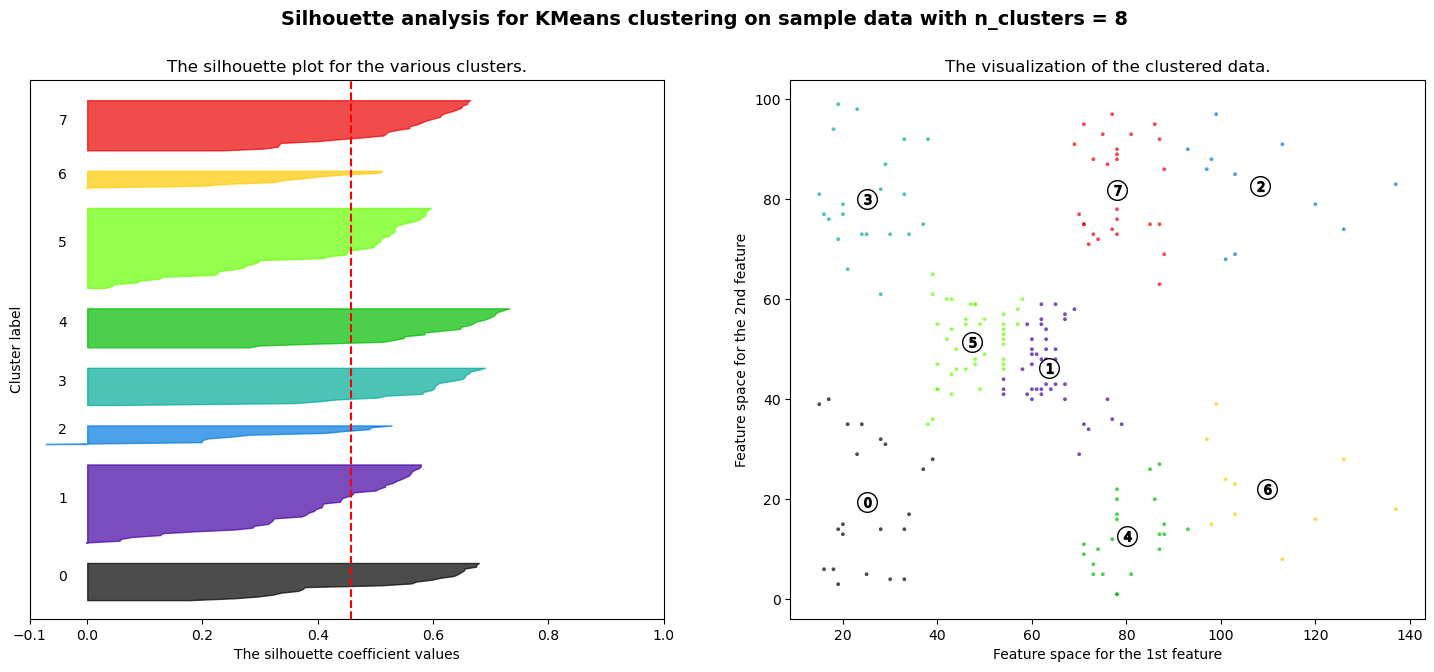

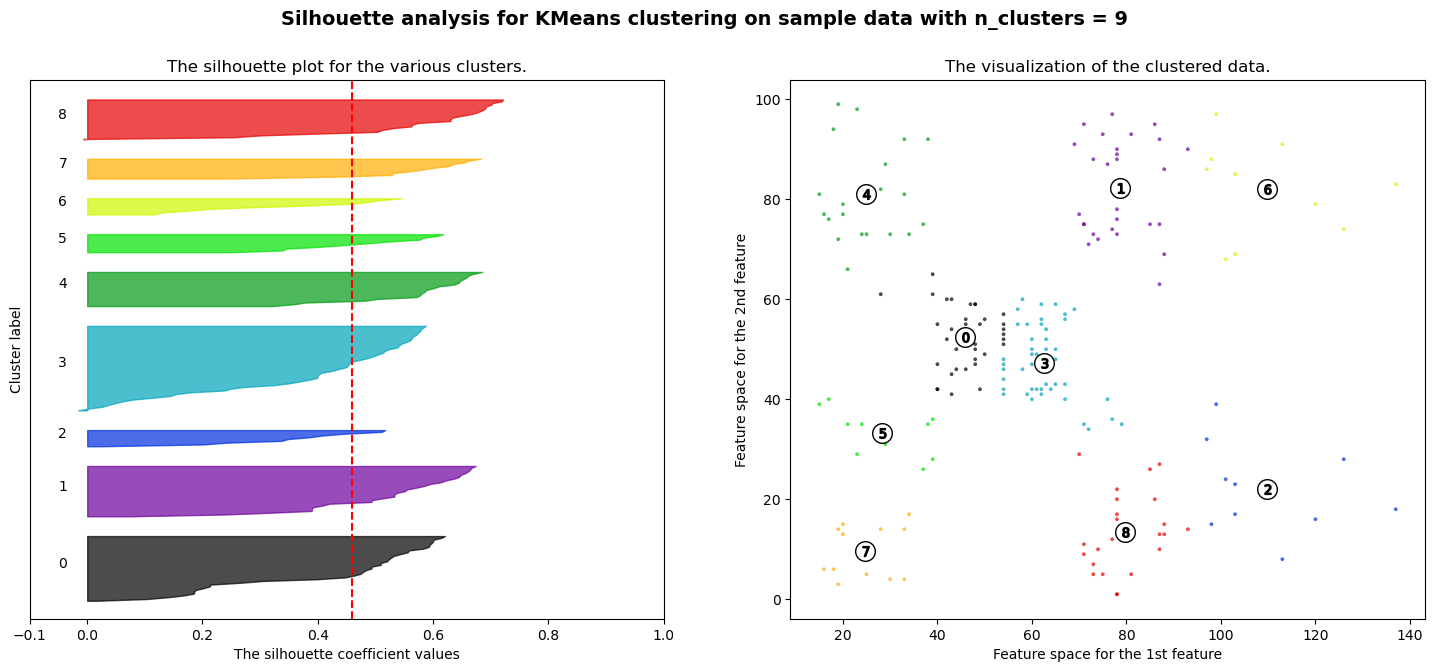

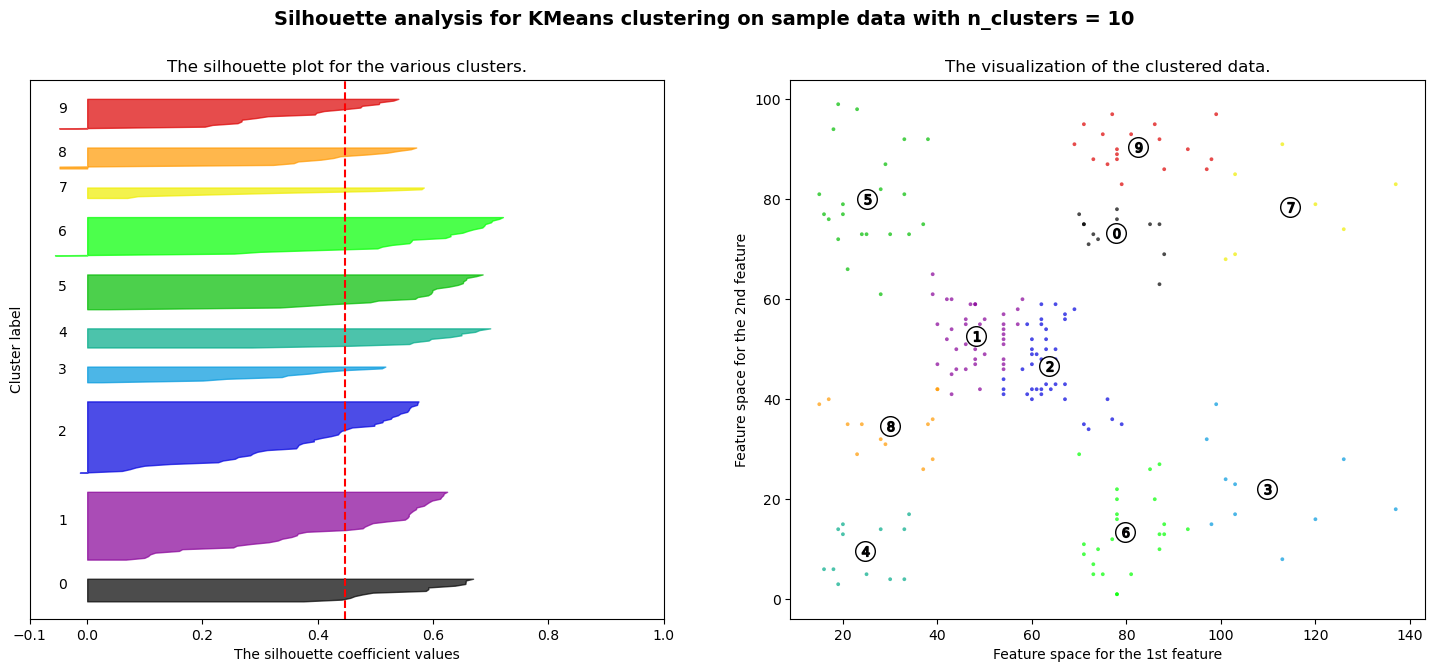

In [46]:
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(M) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(M)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(M, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(M, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        M[:, 0], M[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

### As we see from above that ,For n_clusters = 5 The average silhouette_score is :  0.553931997444648 which is more than any other cluster values.This indicates that this value provide us good model.
### Training our kmeans model with 5 number of clusters

In [47]:
km=KMeans(n_clusters=5,init='k-means++',random_state=0)
y=km.fit_predict(M)

In [48]:
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

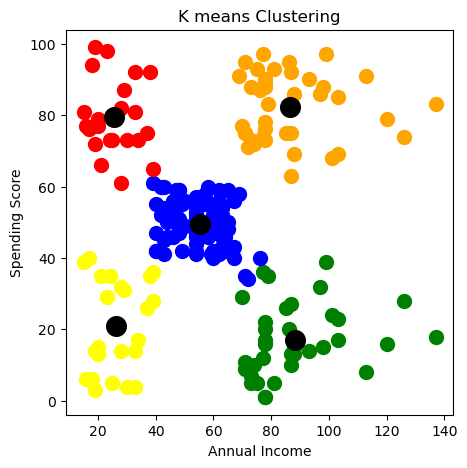

In [50]:
plt.figure(figsize=(5,5))
plt.scatter(M[y==0,0],M[y==0,1],s=100,color='green')
plt.scatter(M[y==1,0],M[y==1,1],s=100,color='blue')
plt.scatter(M[y==2,0],M[y==2,1],s=100,color='orange')
plt.scatter(M[y==3,0],M[y==3,1],s=100,color='red')
plt.scatter(M[y==4,0],M[y==4,1],s=100,color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=200,color='black')
plt.title('K means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

**Conclusion**

We have 5 clusters as shown showing the 5 type of people in our data

**Low annual income with low spending score= Careful People**

**Low annual income with high spending score=Careless People**

**Medium annual income with medium spending score=General**

**High annual income with high spending score=Target**

**High annual income with low spending score=miser**

## Making Clusters using Age and Spending Score

In [51]:
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.cm as cm
wcss=[]

for itr in range(1,11):
    km=KMeans(n_clusters=itr,init='k-means++',random_state=8)
    km.fit(S)
    wcss.append(km.inertia_)

Text(0, 0.5, 'wcss')

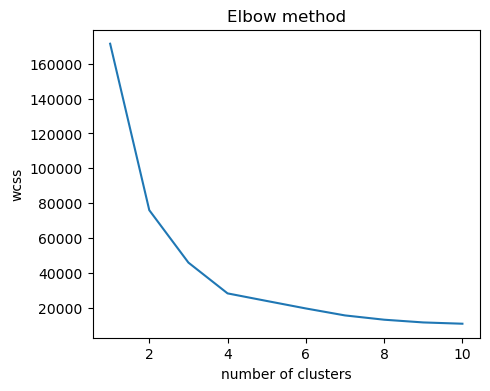

In [52]:
plt.figure(figsize=(5,4))
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')

In [54]:
km=KMeans(n_clusters=4,init='k-means++',random_state=0)
k=km.fit_predict(S)

In [55]:
k

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

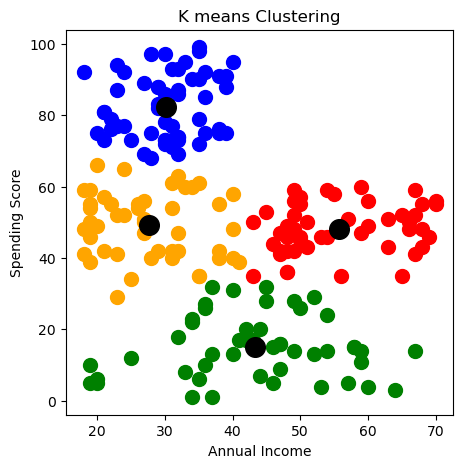

In [56]:
plt.figure(figsize=(5,5))
plt.scatter(S[k==0,0],S[k==0,1],s=100,color='green')
plt.scatter(S[k==1,0],S[k==1,1],s=100,color='blue')
plt.scatter(S[k==2,0],S[k==2,1],s=100,color='orange')
plt.scatter(S[k==3,0],S[k==3,1],s=100,color='red')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=200,color='black')
plt.title('K means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [57]:
## Using Age we are not getting good clusters so we form clusters using Spending Score and Annual Income

# Hierarchial Clustering

## Finding the number of clusters using dendograms

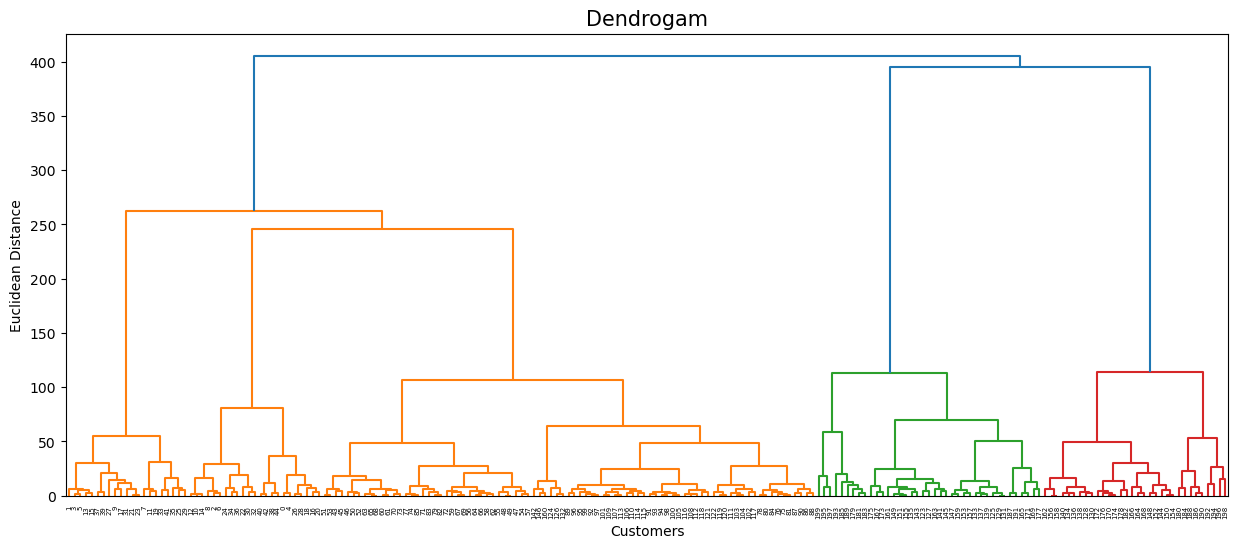

In [59]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(15,6)
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(M, method = 'ward'))
plt.title('Dendrogam', fontsize = 15)
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

**Five horizontal lines pass through longest verticle line and hence we have 5 clusters.**
**Using age and spending score we will get only 2 clusters and that does not make sense**

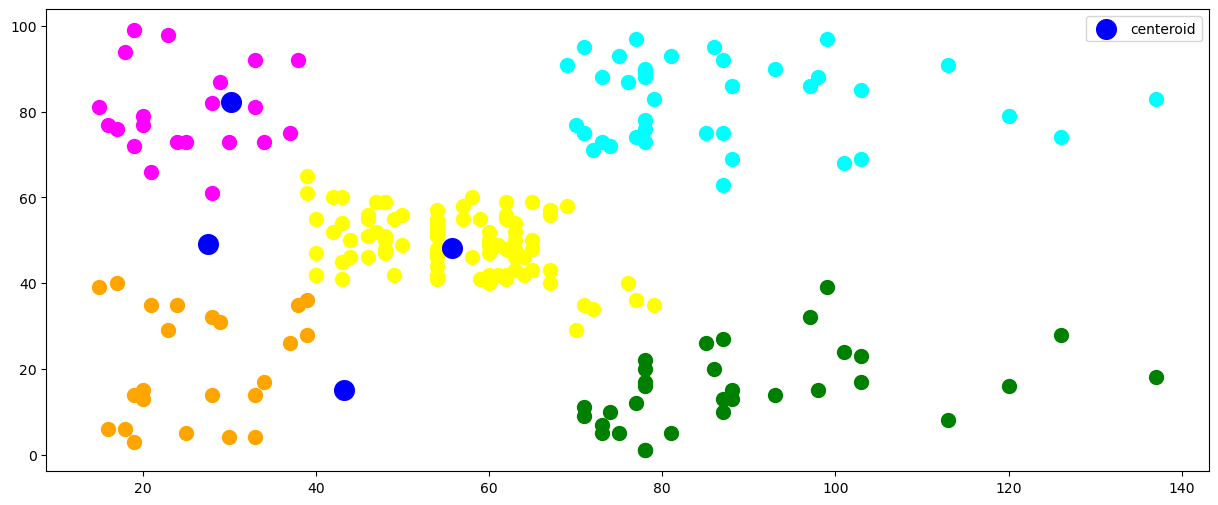

In [60]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(M)

plt.scatter(M[y_hc == 0, 0], M[y_hc == 0, 1], s = 100, c = 'green')
plt.scatter(M[y_hc == 1, 0],M[y_hc == 1, 1], s = 100, c = 'yellow')
plt.scatter(M[y_hc == 2, 0], M[y_hc == 2, 1], s = 100, c = 'cyan')
plt.scatter(M[y_hc == 3, 0], M[y_hc == 3, 1], s = 100, c = 'magenta')
plt.scatter(M[y_hc == 4, 0], M[y_hc == 4, 1], s = 100, c = 'orange')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 200, c = 'blue' , label = 'centeroid')
plt.legend()


**Conclusion**

We have 5 clusters as shown showing the 5 type of people in our data

**Low annual income with low spending score= Careful People**

**Low annual income with high spending score=Careless People**

**Medium annual income with medium spending score=General**

**High annual income with high spending score=Target**

**High annual income with low spending score=miser**

In [61]:
## Using both K-Means and Hierchial Clustering we get 5 clusters

# DBSCAN Clustering

## finding best eps and min samples 

In [63]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(M)
distances, indices = nbrs.kneighbors(M)

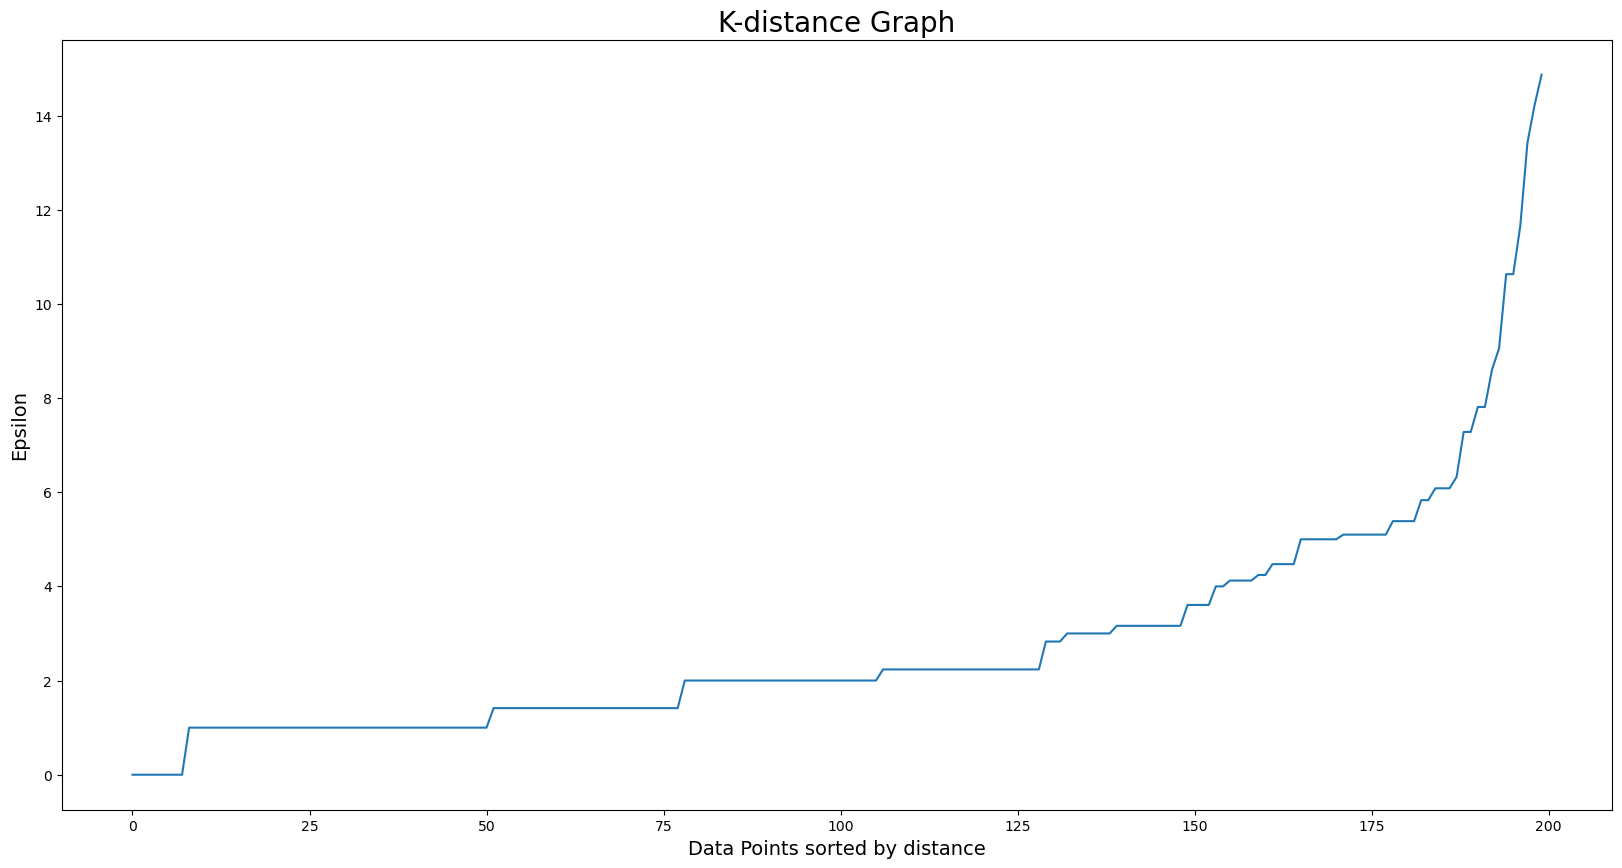

In [64]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [66]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np


eps_values = np.arange(5,6,7)  
min_samples_values = range(2,10)     

best_eps = None
best_min_samples = None
best_silhouette = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(M)
        
        unique_labels = len(np.unique(labels))
        
        if unique_labels > 1:
            silhouette_avg = silhouette_score(M, labels)
            
            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

print("Best Epsilon:", best_eps)
print("Best Min Samples:", best_min_samples)
print("Best Silhouette Score:", best_silhouette)


Best Epsilon: 5
Best Min Samples: 2
Best Silhouette Score: 0.21005909857820562


In [67]:
model_dbscan = DBSCAN(eps=5, min_samples=2).fit(M)
silt_score=model_dbscan.labels_

In [68]:
silt_score

array([ 0,  1,  2,  1,  0,  1,  2, -1,  2,  1,  3,  4,  3,  1,  3,  1,  5,
       -1, -1,  4,  5,  6, -1,  6,  7, -1,  5, -1,  5, -1,  8,  6,  8,  9,
        7, -1,  7,  6, 10,  6, 11,  9, 11, 12, 10, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 13, -1, 14, 15, 13, 16, 14, 16, 14, 15, 14, 16, 13,
       16, 14, 16, 14, 16, 13, 17, 13, 16, 13, 17, 14, 16, 13, 16, 13, 16,
       14, 16, 13, 16, 14, 16, 14, 17, 13, 16, 13, 18, 19, -1, 20, 18, -1,
       21, 19, 21, 20, 21, -1, 21, -1, -1, -1, -1, 22, -1, 22, -1, -1, 23,
       24, -1, -1, 23, 24, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [63]:
import matplotlib.pyplot as plt

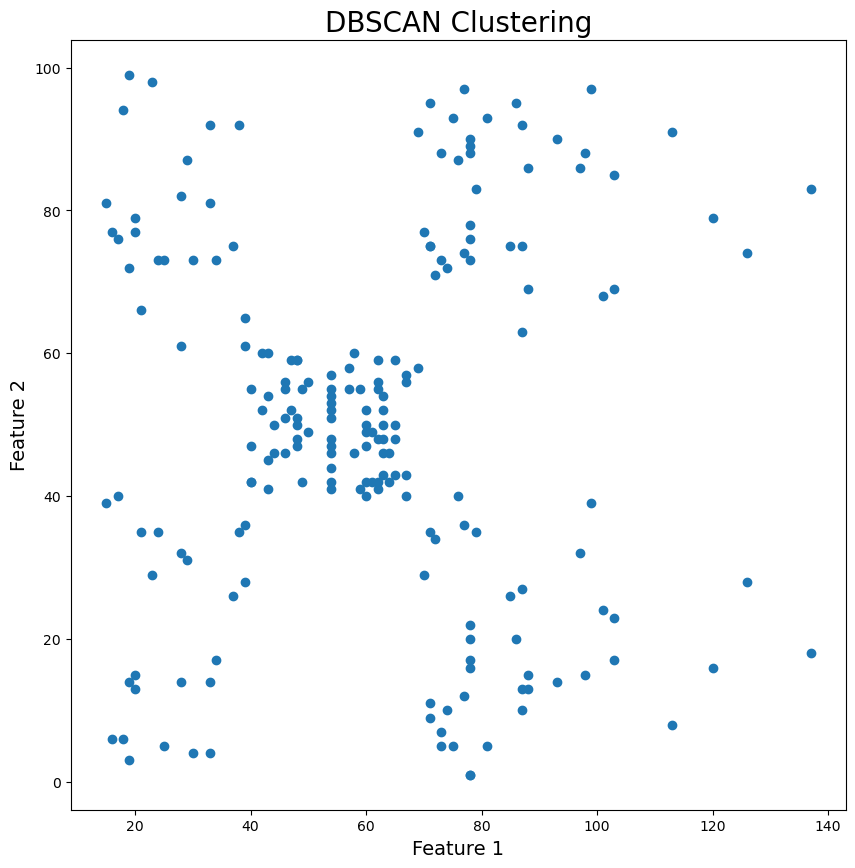

In [65]:
plt.figure(figsize=(10,10))
plt.scatter(M[:, 0], M[:, 1])
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# Here we'll use silhouette score method to choose the best clustering algorithm

In [71]:
def silhouette_method(M,algo,y_pred):
  print('=================================================================================')
  print('Clustering ',algo," : silhouette score : ",silhouette_score(M,y_pred) )


silhouette_method(M,' : KMeans',y)
silhouette_method(M,' : Agglomerative',y_hc)
silhouette_method(M,' : DBSCAN_clustering',silt_score)
print('=================================================================================')
     

Clustering   : KMeans  : silhouette score :  0.08901800691337511
Clustering   : Agglomerative  : silhouette score :  0.5529945955148897
Clustering   : DBSCAN_clustering  : silhouette score :  0.21005909857820562


# Hierarchial Clustering performed best